In [1]:
import pandas as pd
import numpy as np
from plot import mv_plot as plot
from sklearn.linear_model import LinearRegression
from numba import njit
from time import time

In [2]:
@njit
def sec(X, Y, w, b):
    X = np.ascontiguousarray(X)  
    y_pred = X @ w + b
    error = y_pred - Y
    cost = (1 / (2 * X.shape[0])) * np.sum(error ** 2)
    return cost

In [3]:
def predict(x_train, y_train, x_test, y_test):
    st = time()
    reg = LinearRegression().fit(x_train, y_train)
    ed = time()

    slope = reg.coef_
    intercept = reg.intercept_

    x_train_c = np.ascontiguousarray(x_train)
    x_test_c = np.ascontiguousarray(x_test)

    train_cost = sec(x_train_c, y_train, slope, intercept)
    test_cost = sec(x_test_c, y_test, slope, intercept)

    print("Train Cost: ", train_cost)
    print("Test Cost: ", test_cost)
    print(f"w = {np.round(slope, 4)}, b = {intercept:.4f}")
    print(f"time: {(ed - st):.4f}s")

    plot(slope[0], slope[1], slope[2], intercept, test_cost)

Train Cost:  2984420144327.1987
Test Cost:  3036691687839.659
w = [12855945.8354 -1115663.6552  3702047.6071], b = 2268725.9932
time: 0.2022s


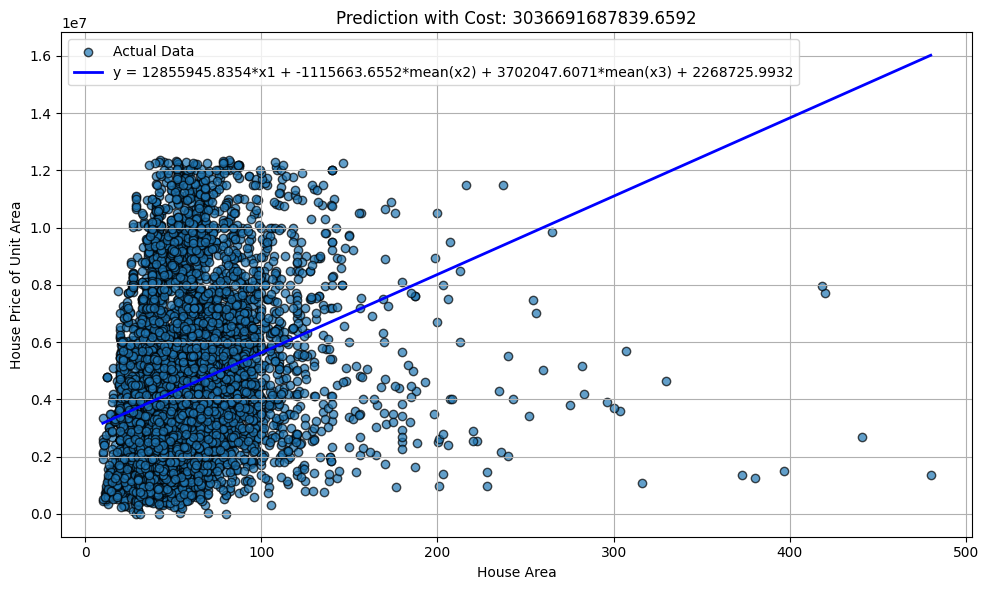

In [4]:
if __name__ == "__main__":
    # Data Processing
    ## Train on processed data and test on actual data
    data = pd.read_csv("house_price.csv")
    # 70 : 30 ratio
    train_data = data[:7950705]
    test_data = data[7950705:]
    
    x_train_total = train_data[['area', 'rooms', 'kitchen_area']].to_numpy()
    y_train_total = train_data['price'].to_numpy()

    x_test_total = test_data[['area', 'rooms', 'kitchen_area']].to_numpy()
    y_test_total = test_data['price'].to_numpy()


    # Normalization
    x_min = x_train_total.min(axis=0)
    x_max = x_train_total.max(axis=0)
    scaling = lambda x: (x - x_min) / (x_max - x_min)

    x_train = scaling(x_train_total).astype(np.float64)
    x_test = scaling(x_test_total).astype(np.float64)
    y_train = y_train_total.astype(np.float64)
    y_test = y_test_total.astype(np.float64)

    predict(x_train[:10000], y_train[:10000], x_test[:10000], y_test[:10000])